# PNEUMONIA
Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Typically, symptoms include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable.

Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases. Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system.Diagnosis is often based on the symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or health care-associated pneumonia.

Vaccines to prevent certain types of pneumonia are available. Other methods of prevention include hand washing and not smoking. Treatment depends on the underlying cause. Pneumonia believed to be due to bacteria is treated with antibiotics. If the pneumonia is severe, the affected person is generally hospitalized. Oxygen therapy may be used if oxygen levels are low.

Pneumonia affects approximately 450 million people globally (7% of the population) and results in about 4 million deaths per year. Pneumonia was regarded by Canadian pathologist William Osler in the 19th century as "the captain of the men of death". With the introduction of antibiotics and vaccines in the 20th century, survival greatly improved. Nevertheless, in developing countries, and also among the very old, the very young and the chronically ill, pneumonia remains a leading cause of death. Pneumonia often shortens suffering among those already close to death and has thus been called "the old man's friend". 

## AIM:
* To classify the given X-Rays into Normal or Pnuemonia using CNN VGG-16 Architechture

## Dataset:
* https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [0]:
# We import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K


In [0]:
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/17810/23812/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1584294117&Signature=sx2p83AlBJ6OtykZVikHhm1Cigc1F4g0kyjMlv6yJPJGPo8uMlbWwe3N0GQ91cu%2FjmbuEqE8oUfl0cg%2FLbXopKmOgKzI4YzAt%2B7PUfocVsUrZv4lEA4MKA8zlaxooScAHJxkIv7P3CIUwNS1JlMa2HnwnWavQRGtUZocS3Yy6%2F0%2FqymHQ2eV1xRIgT4Sk0WgFxOx%2BypaPup%2Bv3jJCkAEzMwHtY94lQcM1UlOVwYMMJ40KNgMdY5gZh9Lb8OxME4Tpb2%2FDt67PsrP8zoTTV%2BecFXhM2b1YbNV9LTZYRdT0XDPPC7ykPXHtVygXjC8pUJeGsM89Qnv0WWfm639YXsw6A%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-pneumonia.zip" -O "chest-xray-pneumonia.zip" -c

--2020-03-12 17:42:32--  https://storage.googleapis.com/kaggle-data-sets/17810/23812/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1584294117&Signature=sx2p83AlBJ6OtykZVikHhm1Cigc1F4g0kyjMlv6yJPJGPo8uMlbWwe3N0GQ91cu%2FjmbuEqE8oUfl0cg%2FLbXopKmOgKzI4YzAt%2B7PUfocVsUrZv4lEA4MKA8zlaxooScAHJxkIv7P3CIUwNS1JlMa2HnwnWavQRGtUZocS3Yy6%2F0%2FqymHQ2eV1xRIgT4Sk0WgFxOx%2BypaPup%2Bv3jJCkAEzMwHtY94lQcM1UlOVwYMMJ40KNgMdY5gZh9Lb8OxME4Tpb2%2FDt67PsrP8zoTTV%2BecFXhM2b1YbNV9LTZYRdT0XDPPC7ykPXHtVygXjC8pUJeGsM89Qnv0WWfm639YXsw6A%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-pneumonia.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2463365435 (2.3G) [application/zip]
Saving to: ‘chest-xray-pneumonia.zip’

chest-xray-pneumoni 100%[========

In [0]:
! ls

chest_xray  chest-xray-pneumonia.zip  sample_data


In [0]:
# https://stackoverflow.com/a/36662770/10219869

import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
!ls

chest_xray  chest-xray-pneumonia.zip  sample_data


### Sample X-Ray images 

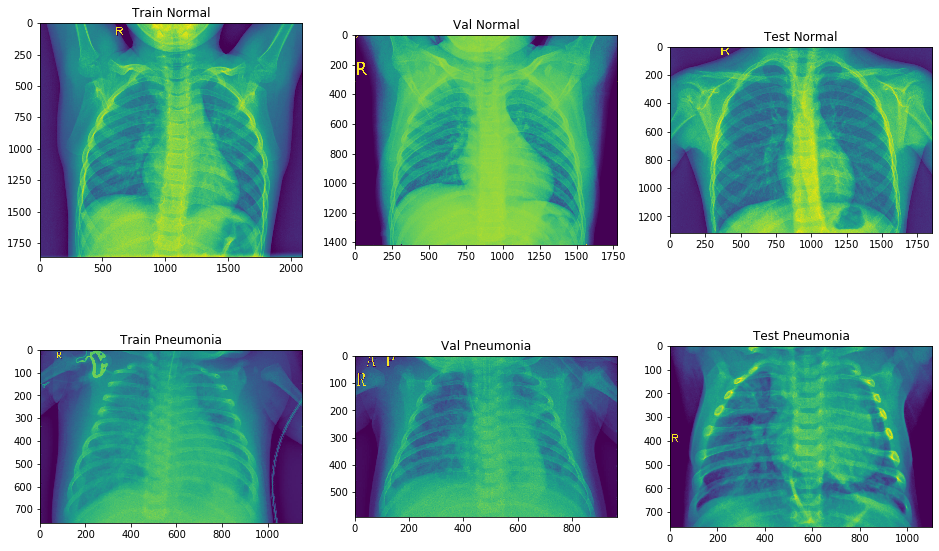

In [0]:
# https://stackoverflow.com/a/41793989/10219869
# https://stackoverflow.com/a/39133654/10219869

f, ax = plt.subplots(2,3, figsize = (16, 10))

ax[0,0].imshow(mpimg.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg'))
ax[0,0].title.set_text('Train Normal')
ax[0,1].imshow(mpimg.imread('chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'))
ax[0,1].title.set_text('Val Normal')
ax[0,2].imshow(mpimg.imread('chest_xray/test/NORMAL/IM-0001-0001.jpeg'))
ax[0,2].title.set_text('Test Normal')
ax[1,0].imshow(mpimg.imread('chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'))
ax[1,0].title.set_text('Train Pneumonia')
ax[1,1].imshow(mpimg.imread('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'))
ax[1,1].title.set_text('Val Pneumonia')
ax[1,2].imshow(mpimg.imread('chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'))
ax[1,2].title.set_text('Test Pneumonia')

### Data segregation

In [0]:
from PIL import Image
from os import listdir

# Train Data
train_data = []

# Normal images labelled as 0
path = 'chest_xray/train/NORMAL/'
for i in listdir(path):
  train_data.append((path+str(i), 0))

# Pneumonia images labelled as 1
path = 'chest_xray/train/PNEUMONIA/'
for i in listdir(path):
  train_data.append((path+str(i), 1))


In [0]:
# creating a dataframe
df = pd.DataFrame(train_data, columns = ['Image', 'Label'])
print(df.shape)
df.head()

(5216, 2)


,Image,Label
0,chest_xray/train/NORMAL/NORMAL2-IM-0568-0001.jpeg,0
1,chest_xray/train/NORMAL/NORMAL2-IM-0950-0001.jpeg,0
2,chest_xray/train/NORMAL/IM-0641-0001.jpeg,0
3,chest_xray/train/NORMAL/NORMAL2-IM-1266-0001.jpeg,0
4,chest_xray/train/NORMAL/IM-0709-0001.jpeg,0


In [0]:
# https://stackoverflow.com/a/55538590/10219869

# Shuffle the data
from sklearn.utils import shuffle

index = df.index
df = shuffle(df)
df.index = index
df.head()

,Image,Label
0,chest_xray/train/PNEUMONIA/person441_virus_894...,1
1,chest_xray/train/PNEUMONIA/person1183_virus_20...,1
2,chest_xray/train/PNEUMONIA/person1589_bacteria...,1
3,chest_xray/train/NORMAL/IM-0622-0001-0001.jpeg,0
4,chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg,0


In [0]:
df['Label'].value_counts()

1    3875
0    1341
Name: Label, dtype: int64

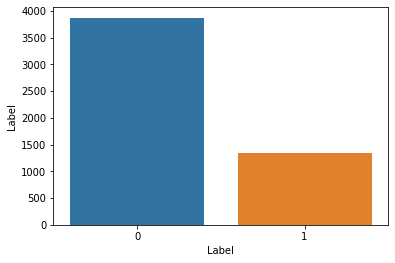

In [0]:
# Bar plot for train labels

ax = sns.barplot(x = df['Label'], y = df['Label'].value_counts())

In [0]:
# To check if the images are from different channels other than 3 channel

for i in df['Image']:
  j = cv2.imread(i)
  j = j.shape
  if j[2] < 3:
    print(j)

# all images are of 3 channel but of different sizes and hence no output.

In [0]:
# Test data
test_data = []

# Normal images labelled as 0
path = 'chest_xray/val/NORMAL/'
for i in listdir(path):
  test_data.append((path+str(i), 0))

# Pneumonia images labelled as 1
path = 'chest_xray/val/PNEUMONIA/'
for i in listdir(path):
  test_data.append((path+str(i), 1))

In [0]:
# creating a dataframe
df_test = pd.DataFrame(test_data, columns = ['Image', 'Label'])
print(df_test.shape)
df_test.head()

(16, 2)


,Image,Label
0,chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg,0
1,chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg,0
2,chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg,0
3,chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg,0
4,chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg,0


In [0]:
# https://stackoverflow.com/a/30946773/10219869
# to check the image is in train dataset

if df['Image'].str.contains( 'NORMAL/NORMAL2-IM-1431-0001.jpeg').any():
  print('yes')

In [0]:
df_test['Label'].value_counts()

1    8
0    8
Name: Label, dtype: int64

In [0]:

for i in df_test['Image']:
  j = cv2.imread(i)
  print(j.shape)

# all images are of 3 channel but of different sizes.

(1416, 1736, 3)
(1302, 1564, 3)
(1416, 1776, 3)
(1104, 1240, 3)
(928, 1288, 3)
(1225, 1632, 3)
(1040, 1272, 3)
(1104, 1328, 3)
(944, 1416, 3)
(864, 1256, 3)
(712, 1072, 3)
(664, 1152, 3)
(592, 968, 3)
(952, 1192, 3)
(656, 1016, 3)
(1128, 1664, 3)


In [0]:
# Val data
val_data = []

# Normal images labelled as 0
path = 'chest_xray/test/NORMAL/'
for i in listdir(path):
  val_data.append((path+str(i), 0))

# Pneumonia images labelled as 1
path = 'chest_xray/test/PNEUMONIA/'
for i in listdir(path):
  val_data.append((path+str(i), 1))

In [0]:
# creating a dataframe
df_val = pd.DataFrame(val_data, columns = ['Image', 'Label'])
print(df_val.shape)
df_val.head()

(624, 2)


,Image,Label
0,chest_xray/test/NORMAL/NORMAL2-IM-0288-0001.jpeg,0
1,chest_xray/test/NORMAL/IM-0059-0001.jpeg,0
2,chest_xray/test/NORMAL/NORMAL2-IM-0302-0001.jpeg,0
3,chest_xray/test/NORMAL/NORMAL2-IM-0276-0001.jpeg,0
4,chest_xray/test/NORMAL/IM-0105-0001.jpeg,0


In [0]:

index = df_val.index
df_val = shuffle(df_val)
df_val.index = index
df_val.head()

,Image,Label
0,chest_xray/test/PNEUMONIA/person124_bacteria_5...,1
1,chest_xray/test/PNEUMONIA/person104_bacteria_4...,1
2,chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg,0
3,chest_xray/test/NORMAL/NORMAL2-IM-0352-0001.jpeg,0
4,chest_xray/test/PNEUMONIA/person22_virus_54.jpeg,1


In [0]:
df_val['Label'].value_counts()

1    390
0    234
Name: Label, dtype: int64

In [0]:

for i in df_val['Image']:
  j = cv2.imread(i)
  j = j.shape
  if j[2] < 3:
    print(j)

# all images are of 3 channel but of different sizes and hence no output.

### Shaping the data into Train, Validation and Test

In [0]:
df_train= df[:5000]
df_tests= df_test.append(df[5001:], ignore_index=True)
print('The shape of train data:', df_train.shape)
print('The shape of validation data:', df_val.shape)
print('The shape of test data:', df_tests.shape)

The shape of train data: (5000, 2)
The shape of validation data: (624, 2)
The shape of test data: (231, 2)


In [0]:
train_gen = ImageDataGenerator(featurewise_center= False, samplewise_center=False, featurewise_std_normalization= False, samplewise_std_normalization=False, zca_whitening=False,
                               zca_epsilon=1e-06, rotation_range= 30, width_shift_range= 0.3, height_shift_range= 0.3, brightness_range=None, shear_range=0.0, zoom_range=0.3,
                               channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip= True, vertical_flip= False, rescale= 1./255, preprocessing_function=None, 
                               data_format= None, validation_split=0.0, dtype='float32')

val_gen = ImageDataGenerator(rescale= 1./255)
test_gen = ImageDataGenerator(rescale= 1./255)


In [0]:
# https://stackoverflow.com/a/17950531/10219869

df_train['Label'] = df_train['Label'].apply(str)
df_val['Label'] = df_val['Label'].apply(str)
df_tests['Label'] = df_tests['Label'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train_generator = train_gen.flow_from_dataframe(dataframe = df_train, x_col= 'Image', y_col= 'Label',target_size= (224, 224))

val_generator = val_gen.flow_from_dataframe(dataframe = df_val, x_col= 'Image', y_col= 'Label',target_size= (224, 224))

test_generator = test_gen.flow_from_dataframe(dataframe = df_tests, x_col= 'Image', y_col= 'Label',target_size= (224, 224), shuffle= False)

Found 5000 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
Found 231 validated image filenames belonging to 2 classes.


### Sample images after using ImageDataGenerator featurizations

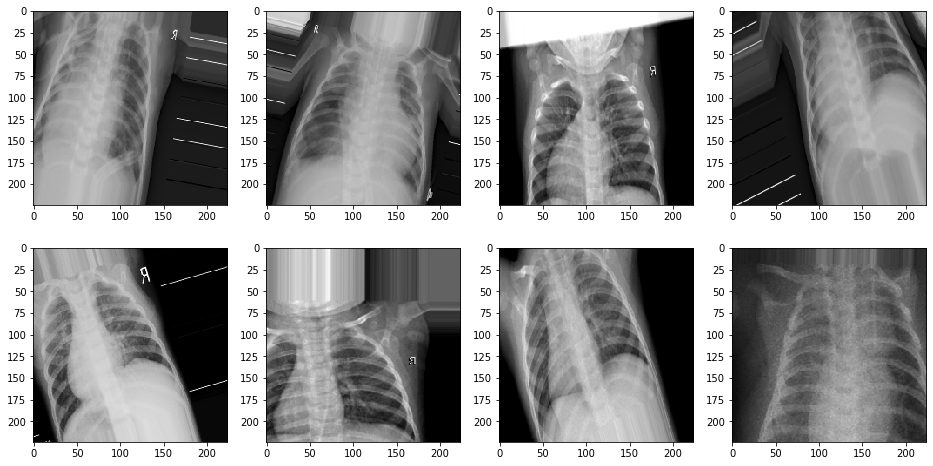

In [0]:
# A sample image from train ggen
# https://stackoverflow.com/a/56316327/10219869

x,y = train_generator.next()
f, axes= plt.subplots(2, 4, figsize= (16, 8))

for i, j in enumerate(axes.flatten()):
  image = x[i]
  j.imshow(image)

plt.show()

### VGG-16 Architecture with 'Trainable=False' upto 25 layers

In [0]:
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape= (224, 224, 3))





58892288/58889256 [==============================] - 2s 0us/step








In [0]:
model= Sequential()
model.add(vgg)
model.add(Conv2D( filters = 256, kernel_size= (3,3), activation= 'relu', name = 'Conv1', data_format= 'channels_last', input_shape= (224, 224, 3), padding= 'same',
                          kernel_regularizer= 'l2' ))
model.add(Conv2D( filters = 256, kernel_size= (3,3), activation= 'relu', padding= 'same', name = 'Conv2', kernel_regularizer= 'l2' ))
model.add(Conv2D( filters = 256, kernel_size= (3,3), activation= 'relu', padding= 'same', name = 'Conv3', kernel_regularizer= 'l2' ))
model.add(BatchNormalization(name= 'BN1'))
model.add(MaxPooling2D(pool_size= (2, 2), name = 'MaxPool1'))
model.add(Dropout(rate= 0.5, name= 'Dropout1'))
model.add(Conv2D(filters = 512, kernel_size= (3,3), padding = 'same', activation= 'relu', name = 'Conv4',  kernel_regularizer= 'l2' ))
model.add(BatchNormalization(name= 'BN2'))
model.add(MaxPooling2D(pool_size= (2, 2), name = 'MaxPool2'))
model.add(Dropout(rate= 0.5, name= 'Dropout2'))
model.add(Flatten())
model.add(Dense(units= 4096, activation= 'relu', name= 'FC1'))
model.add(Dense(units= 2, activation= 'softmax', name= 'Output'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for layer in model.layers[:-25]:
  layer.trainable = False

In [0]:
for layer in model.layers:
  print(layer, layer.trainable)

<keras.engine.training.Model object at 0x7f74394b4da0> True
<keras.layers.convolutional.Conv2D object at 0x7f7439499940> True
<keras.layers.convolutional.Conv2D object at 0x7f7439499978> True
<keras.layers.convolutional.Conv2D object at 0x7f7439435be0> True
<keras.layers.normalization.BatchNormalization object at 0x7f7439446908> True
<keras.layers.pooling.MaxPooling2D object at 0x7f743944b860> True
<keras.layers.core.Dropout object at 0x7f743271c128> True
<keras.layers.convolutional.Conv2D object at 0x7f7439450e80> True
<keras.layers.normalization.BatchNormalization object at 0x7f7432d7ee80> True
<keras.layers.pooling.MaxPooling2D object at 0x7f74393f8630> True
<keras.layers.core.Dropout object at 0x7f7439404a90> True
<keras.layers.core.Flatten object at 0x7f7420052cc0> True
<keras.layers.core.Dense object at 0x7f742004be80> True
<keras.layers.core.Dense object at 0x7f74200593c8> True


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 7, 7, 256)         1179904   
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 256)         590080    
_________________________________________________________________
Conv3 (Conv2D)               (None, 7, 7, 256)         590080    
_________________________________________________________________
BN1 (BatchNormalization)     (None, 7, 7, 256)         1024      
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 3, 3, 256)         0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 3, 3, 256)        

In [0]:
model.compile(optimizer= Adam(lr= 0.0001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# https://datascience.stackexchange.com/a/18722/75326

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(df['Label']), df['Label'])

In [0]:
callback = ModelCheckpoint("vgg16_3.h5", monitor='val_loss', verbose= 1, save_best_only= True, save_weights_only= True, mode='auto', period=1)

In [0]:
history = model.fit_generator(generator = train_generator, steps_per_epoch= df.shape[0] // 32 , epochs= 32, validation_data= val_generator, callbacks=[callback], 
                              validation_steps= df_val.shape[0] // 32, class_weight = class_weights, workers= -1, use_multiprocessing = True )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/32
163/163 [==============================] - 200s 1s/step - loss: 10.2766 - acc: 0.8012 - val_loss: 10.0653 - val_acc: 0.7105

Epoch 00001: val_loss improved from inf to 10.06530, saving model to vgg16_3.h5
Epoch 2/32
163/163 [==============================] - 184s 1s/step - loss: 7.3768 - acc: 0.8679 - val_loss: 6.6154 - val_acc: 0.8176

Epoch 00002: val_loss improved from 10.06530 to 6.61536, saving model to vgg16_3.h5
Epoch 3/32
163/163 [==============================] - 183s 1s/step - loss: 5.7483 - acc: 0.8902 - val_loss: 6.7189 - val_acc: 0.6267

Epoch 00003: val_loss did not improve from 6.61536
Epoch 4/32
163/163 [==============================] - 183s 1s/step - loss: 4.6366 - acc: 0.8905 - val_loss: 4.4481 - val_acc: 0.7889

Epoch 00004: val_loss improved from 6.61536 to 4.44812, saving model to vgg16_3.h5
Epoch 5/32
163/163 [==============================] - 181s 1s/step -

In [0]:
# https://machinelearningmastery.com/check-point-deep-learning-models-keras/

model.load_weights("vgg16_3.h5")
model.compile(optimizer= Adam(lr= 0.0001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Evaluation on test dataset

test_loss, test_score = model.evaluate_generator( generator= test_generator,)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: %.2f%% "% (test_score * 100))

Loss on test set:  0.18496973112677084
Accuracy on test set: 95.67% 


In [0]:
# Get predictions
pred= model.predict_generator(test_generator)
pred=np.argmax(pred,axis=-1)

# Original labels
test_labels= np.array(df_tests['Label'].apply(int))
orig_test_labels = np.argmax(test_labels, axis= -1)

print('Original test labels:', test_labels.shape)
print('Predicted test labels:', pred.shape)

Original test labels: (231,)
Predicted test labels: (231,)


<Figure size 432x288 with 0 Axes>

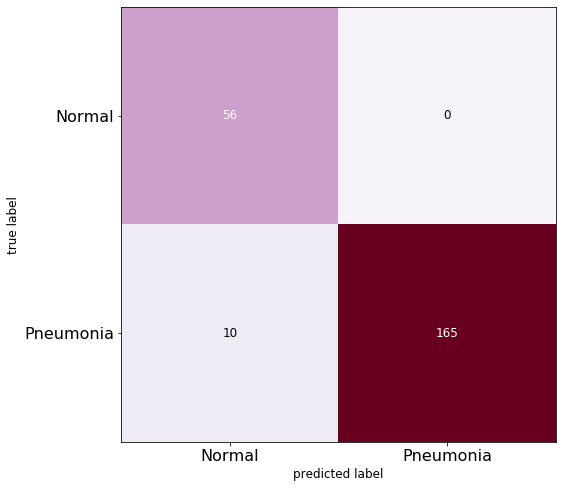

In [0]:
# Get the confusion matrix
cm  = confusion_matrix(test_labels, pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap= 'PuRd')
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.94
Precision of the model is 1.00


In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames ,"Predictions":predictions})
results.to_csv("results.csv",index=False)
results

,Filename,Predictions
0,chest_xray/val/PNEUMONIA/person1946_bacteria_4...,1
1,chest_xray/val/PNEUMONIA/person1952_bacteria_4...,1
2,chest_xray/val/PNEUMONIA/person1947_bacteria_4...,1
3,chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg,0
4,chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg,0
...,...,...
226,chest_xray/train/NORMAL/NORMAL2-IM-0914-0001.jpeg,0
227,chest_xray/train/PNEUMONIA/person265_bacteria_...,1
228,chest_xray/train/PNEUMONIA/person23_bacteria_8...,1
229,chest_xray/train/PNEUMONIA/person1676_bacteria...,1


### Conclusions:
* We have achieved a Loss of 0.18 and an Accuracy of nearly 96%.
* The Precision was perfet at 1.0 and Recall was at 0.94 which was pretty good.
* If the dataset was large we could have achieved more, nonetheless this dataset size was good to model.